In [23]:
import pandas as pd
from pycaret.classification import *
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()


# data = pd.read_csv('/home/hk_lenovo_pc/data/dataset.csv')
data = pd.read_csv('/home/hk_sc/data/dataset.csv')

# shuffle the DataFrame rows
data = data.sample(frac = 1)
data.head()

s = setup(data, target = 'signal', session_id = 123, use_gpu=False)
best = compare_models()

,Description,Value
0,Session id,123
1,Target,signal
2,Target type,Multiclass
3,Target mapping,"dont_trade: 0, long: 1, short: 2"
4,Original data shape,"(1275, 32)"
5,Transformed data shape,"(1275, 32)"
6,Transformed train set shape,"(892, 32)"
7,Transformed test set shape,"(383, 32)"
8,Numeric features,31
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8027,0.9359,0.8027,0.8051,0.8006,0.7041,0.7069,0.0670
rf,Random Forest Classifier,0.7466,0.9087,0.7466,0.7495,0.7459,0.6197,0.6216,0.0710
lightgbm,Light Gradient Boosting Machine,0.7365,0.9008,0.7365,0.7372,0.7327,0.6047,0.6082,0.1670
knn,K Neighbors Classifier,0.7186,0.8909,0.7186,0.7176,0.7101,0.5780,0.5846,0.2310
dt,Decision Tree Classifier,0.6872,0.7654,0.6872,0.6906,0.6858,0.5307,0.5332,0.0360
gbc,Gradient Boosting Classifier,0.6715,0.8603,0.6715,0.6672,0.6662,0.5074,0.5099,0.0680
ada,Ada Boost Classifier,0.5562,0.7861,0.5562,0.5467,0.5469,0.3345,0.3378,0.0490
nb,Naive Bayes,0.5427,0.7806,0.5427,0.5450,0.5044,0.3140,0.3334,0.0330
qda,Quadratic Discriminant Analysis,0.5371,0.7619,0.5371,0.5229,0.5072,0.3056,0.3180,0.0390
lr,Logistic Regression,0.5113,0.5511,0.5113,0.5240,0.4710,0.2669,0.2971,0.4030


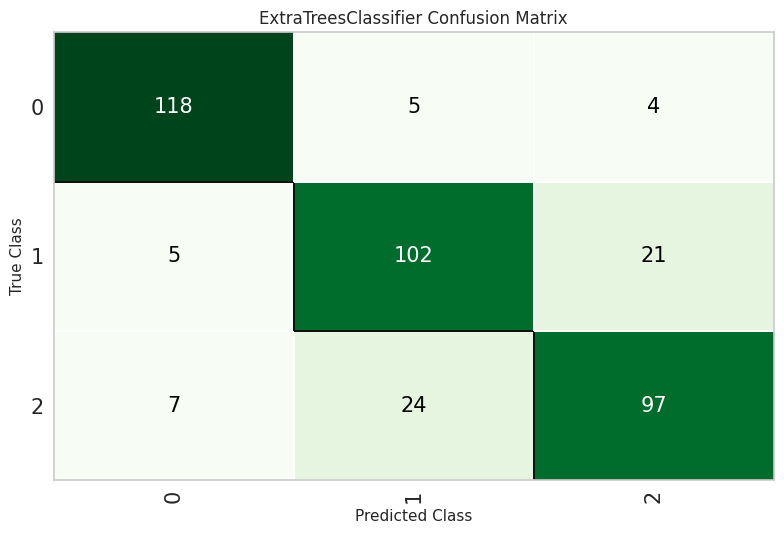

In [24]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

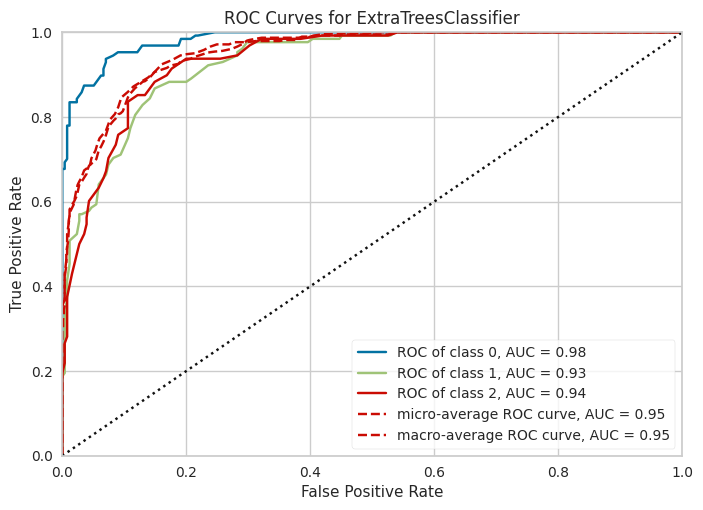

In [25]:
# plot AUC
plot_model(best, plot = 'auc')

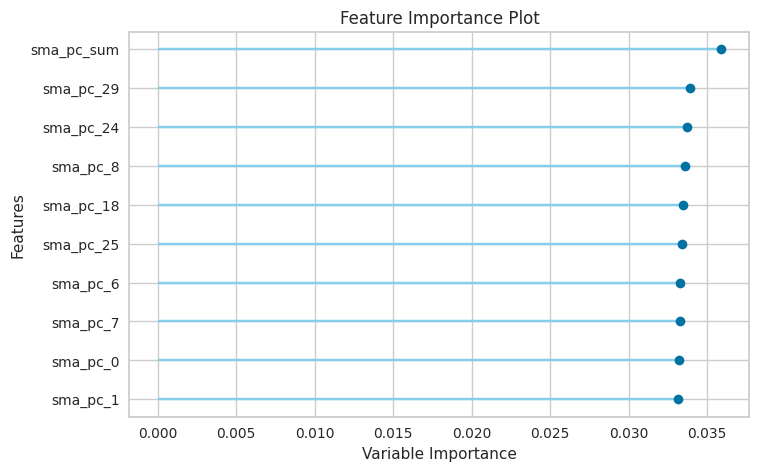

In [17]:
# plot feature importance
plot_model(best, plot = 'feature')

In [18]:
evaluate_model(best)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…